# LABORATORIO PERCEPCIÓN COMPUTACIONAL
* Realizado por:
    * José María Pérez Martin
    * Rubén González Navarro
    * Nicolás Felipe Trujillo Montero

## Filtro Salt & Pepper

In [1]:
# Tenemos que importar estas librerias para realizar el filtro Salt & Pepper
import random
import cv2
import numpy as np
from tqdm import tqdm
from skimage import data, color
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def salt_pepper_noise(image, prob):
    '''
    Add salt and pepper noise to image
    image: Input image
    prob: Probability of the noise
    output: Returns the input image with salt and pepper noise added
    '''
    output = image.copy()
    
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
            
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    
    return output

In [3]:
def median_filter(img_noise, N=3):
    '''
    Median Filter
    img_noise: image with noise
    N: Kernel size
    img_noise: Returns the input image filtered
    '''
    
    n_fil, n_col = img_noise.shape[0], img_noise.shape[1]
    
    for idx_x in tqdm(range(n_fil)):
        
        for idx_y in range(n_col):
           
            esq = (int(N/2))
            wdw = []
            
            for idx_x_wd in range(idx_x-esq, idx_x+esq+1):
                
                for idx_y_wd in range(idx_y-esq, idx_y+esq+1):
                    
                    if not( (idx_x_wd < 0) | (idx_x_wd >= n_fil) | \
                        (idx_y_wd < 0) | (idx_y_wd >= n_col) ):
                        wdw.append(img_noise[idx_x_wd][idx_y_wd])
            
            img_noise[idx_x][idx_y] = np.median(wdw)
            
    return img_noise

In [4]:
def plot_hist(img):
    '''
    Histogram Calculation for a Gray Scale Image
    img: Input image
    values: Returns an array containing the histogram values
    '''
    
    values = np.zeros((256,), dtype=int)
    
    row, col = img.shape
  
    for i in range(row):
        for j in range(col):
            pos = img[i,j]
            values[pos] += 1
      
    return values

In [5]:
def to_gray(img):
    '''
    Converts an BGR image to a Gray Scale Image
    img: Input image
    grayImg: Gray Scale output image
    '''

    bgr_planes = cv2.split(img)
   
    row, col, _ = img.shape
    
    grayImg = np.zeros((row, col), dtype = "uint8")
    
    for i in range(row):
        for j in range(col):
            grayImg[i,j] = 0.30 * bgr_planes[2][i,j] + 0.59*bgr_planes[1][i,j] + 0.11 * bgr_planes[0][i,j]
       
    return grayImg

100%|██████████████████████████████████████████████████████████████████████████████| 2118/2118 [01:29<00:00, 23.63it/s]


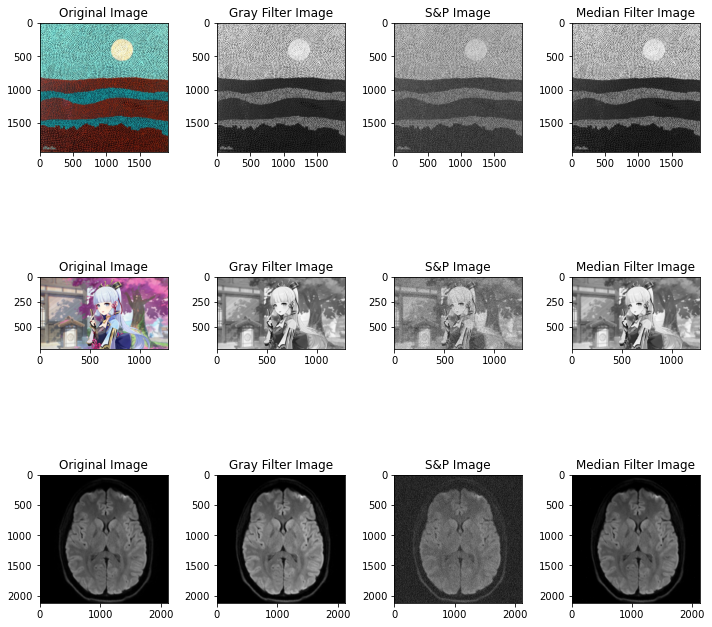

In [6]:
# Variables Globales
# Lista de imagenes para probar los filtros
img = ['Pintura_Puntos.png',
       'imagen_genshin.png',
       'cerebro.png'
      ]

img_saves = []

fig, ax = plt.subplots(len(img), 4, figsize=(10, 10))

for _img, _idx_img in zip(img, range(len(img)) ):
    
    # 1.- Por cada imagen, enseñamos la original
    _img_original = io.imread(_img)
    ax[_idx_img, 0].imshow(_img_original, aspect='equal')
    ax[_idx_img, 0].set_title('Original Image')
    
    # 2.- Pasamos por nuestro filtro de conversion a gris
    _img_gris = to_gray(_img_original)
    img_saves.append(_img_gris)
    ax[_idx_img, 1].imshow(_img_gris, cmap=plt.get_cmap('gray'), aspect='equal')
    ax[_idx_img, 1].set_title('{} Image'.format("Gray Filter"))
    
    # 3.- Pasamos por nuestro filtro Salt & Pepper
    _img_noise = salt_pepper_noise(_img_gris, 0.30)
    img_saves.append(_img_noise)
    ax[_idx_img, 2].imshow(_img_noise, cmap=plt.get_cmap('gray'), aspect='equal')
    ax[_idx_img, 2].set_title('{} Image'.format("S&P"))
    
    # 4.- Pasamos por nuestro filtro de la Mediana
    _img_median = median_filter(_img_noise)
    img_saves.append(_img_median)
    ax[_idx_img, 3].imshow(_img_median, cmap=plt.get_cmap('gray'), aspect='equal')
    ax[_idx_img, 3].set_title('{} Image'.format("Median Filter"))
    
plt.tight_layout()
plt.show()

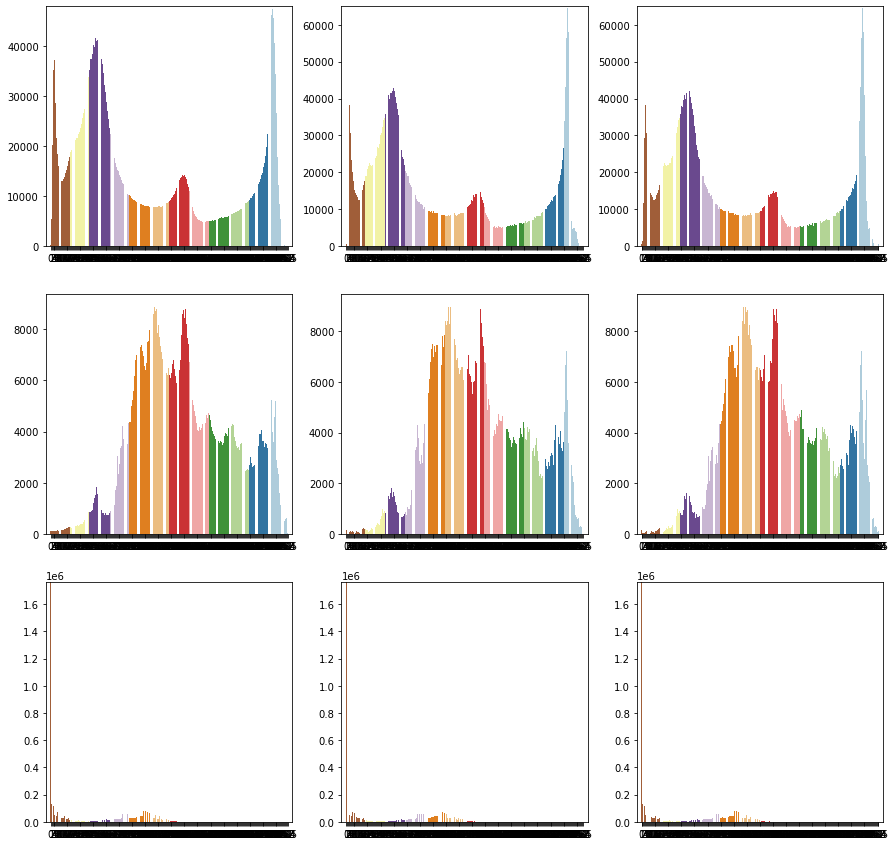

In [7]:
histog = ["HistogramFilter_Original", "HistogramFilter_S&A", "HistogramFilter_Median"]

fig, ax = plt.subplots(len(img), len(histog), figsize=(15, 15))

for _img, _idx_img in zip(img, range(len(img)) ):
    
    # Histograma Imagen Original en Gris
    values = plot_hist(img_saves[_idx_img*len(histog) + 0])
    p1 = sns.barplot(ax = ax[_idx_img, 0], x=np.arange(len(values)), y=values, palette=sns.color_palette("Paired_r",len(values)))
    p1.set(ylim=(0,np.amax(values) + 500))
    p1.set(xlim=(-5,260))

    # Histograma Imagen Original en Gris con Salt & Pepper
    values = plot_hist(img_saves[_idx_img*len(histog) + 1])
    p2 = sns.barplot(ax = ax[_idx_img, 1], x=np.arange(len(values)), y=values, palette=sns.color_palette("Paired_r",len(values)))
    p2.set(ylim=(0,np.amax(values) + 500))
    p2.set(xlim=(-5,260))

    # Histograma Imagen Original en Gris con Filtro de Mediana
    values = plot_hist(img_saves[_idx_img*len(histog) + 2])
    p3 = sns.barplot(ax = ax[_idx_img, 2], x=np.arange(len(values)), y=values, palette=sns.color_palette("Paired_r",len(values)))
    p3.set(ylim=(0,np.amax(values) + 500))
    p3.set(xlim=(-5,260))
    
